## libstempo tutorial: basic functionality

#### Michele Vallisneri, vallis@vallis.org, 2013/04/30, revised 2014/03/28

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import (print_function, division, unicode_literals)

In [2]:
import math, numpy as N, matplotlib.pyplot as P

Load the libstempo Python extension. It requires a source installation of tempo2, as well as current Python and compiler, and the numpy and Cython packages.

In [3]:
import libstempo as T

T.data = T.__path__[0] + '/data/' # example files

In [4]:
T.tempo2version()

StrictVersion ('1.102')

We load a single-pulsar object. Doing this will automatically run the tempo2 fit routine once.

In [5]:
import os
psr = T.tempopulsar(parfile = os.path.join(T.data,'J1909-3744_NANOGrav_dfg+12.par'),
                    timfile = os.path.join(T.data,'J1909-3744_NANOGrav_dfg+12.tim'))

Let's start simple: what is the name of this pulsar?

In [6]:
psr.name

'1909-3744'

TOAs (in MJD), their errors (in us), and the observation frequencies are directly accessible as numpy arrays, with the native types of the data.

In [7]:
psr.toas()

array([ 53292.017,  53292.048,  53355.829, ...,  54641.18,  54706.997,
        54764.834], dtype=float128)

In [8]:
psr.toaerrs

array([ 1.231,  4.668,  0.453, ...,  0.158,  1.336,  0.316])

In [9]:
psr.freqs

array([ 1372.,  1372.,  1372., ...,   884.,   884.,   884.])

Residuals (in seconds) are returned by residuals(). Note that toas() and residuals() are functions, while toaerrs and freqs are just attributes, because the former will change when the timing-model parameters are changed (see below).

In [10]:
psr.residuals()

array([-1.1864301e-07,  7.1727284e-06,  1.0683651e-06, ...,  4.026983e-07,
        1.4175199e-06, -4.9959223e-07], dtype=float128)

The number of observations is psr.nobs.

In [11]:
psr.nobs, psr.nobs == len(psr.toas())

(1001, True)

We can plot TOAs vs. residuals, but we should first sort the arrays; otherwise the array follow the order in the tim file, which may not be chronological.

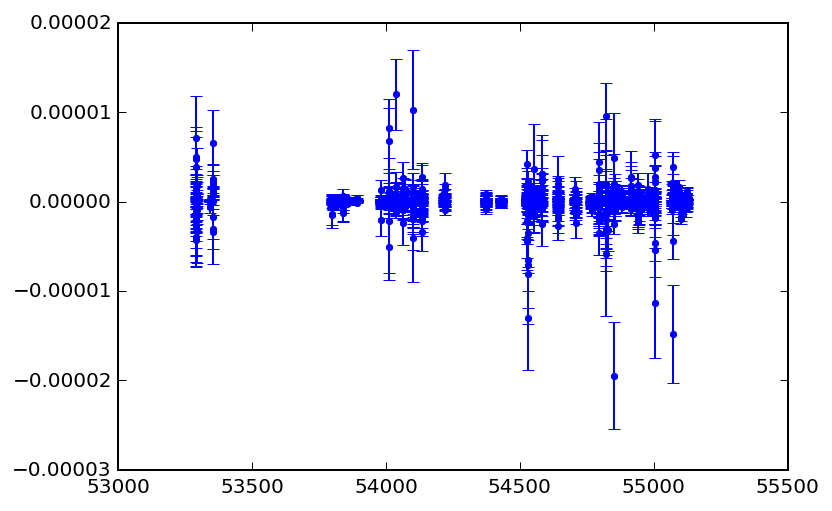

In [12]:
i = N.argsort(psr.toas())

P.errorbar(psr.toas()[i],psr.residuals()[i],yerr=1e-6*psr.toaerrs[i],fmt='.');

We can also see what flags have been set on the observations, and what their values are. The latter returns a numpy vector of strings.

In [13]:
psr.allflags

['fe', 'be', 'B', 'bw', 'tobs', 'pta', 'proc', 'chanid']

In [14]:
psr.flags['chanid']

array([b'gasp_1372', b'gasp_1372', b'gasp_1372', ..., b'gasp_884',
       b'gasp_884', b'gasp_884'], 
      dtype='|S32')

In fact, there's a commodity routine to plot residuals, taking flags into account.

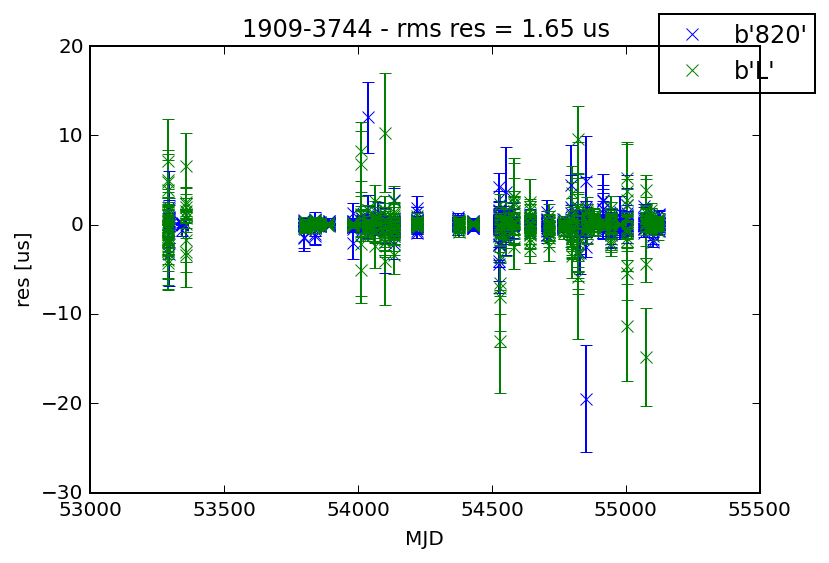

In [15]:
import libstempo.plot as LP

LP.plotres(psr,group='B')

Timing-model parameters can be accessed by using psr as a Python dictionary.

In [16]:
print(psr.pars)
psr['RAJ'].val, psr['RAJ'].err

('RAJ', 'DECJ', 'F0', 'F1', 'PMRA', 'PMDEC', 'PX', 'SINI', 'PB', 'A1', 'TASC', 'EPS1', 'EPS2', 'M2', 'DMX_0002', 'DMX_0003', 'DMX_0004', 'DMX_0005', 'DMX_0006', 'DMX_0007', 'DMX_0008', 'DMX_0009', 'DMX_0010', 'DMX_0011', 'DMX_0012', 'DMX_0013', 'DMX_0014', 'DMX_0015', 'DMX_0016', 'DMX_0017', 'DMX_0018', 'DMX_0019', 'DMX_0020', 'DMX_0021', 'DMX_0022', 'DMX_0023', 'DMX_0024', 'DMX_0025', 'DMX_0026', 'DMX_0027', 'DMX_0028', 'DMX_0029', 'DMX_0030', 'DMX_0031', 'DMX_0032', 'JUMP1', 'JUMP2', 'JUMP3', 'JUMP4', 'JUMP5', 'JUMP6', 'JUMP7', 'JUMP8', 'JUMP9', 'JUMP10', 'JUMP11', 'JUMP12', 'JUMP13', 'JUMP14', 'JUMP15', 'JUMP16', 'JUMP17', 'JUMP18', 'JUMP19', 'JUMP20', 'JUMP21', 'JUMP22', 'JUMP23', 'JUMP24', 'JUMP25', 'JUMP26', 'JUMP27', 'JUMP28', 'JUMP29', 'JUMP30', 'JUMP31', 'JUMP32', 'JUMP33', 'JUMP34', 'JUMP35', 'JUMP36', 'JUMP37')


(5.016908067405245674, 7.7538282881277657355e-10)

The names of all parameters and all fitted parameters are returned by psr.allpars and psr.pars. We show only the first few.

In [17]:
print(psr.allpars[:10])
print(psr.pars[:10])

('RAJ', '', 'DECJ', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6')
('RAJ', 'DECJ', 'F0', 'F1', 'PMRA', 'PMDEC', 'PX', 'SINI', 'PB', 'A1')


The number of fitting parameters is in psr.ndim.

In [18]:
psr.ndim, psr.ndim == len(psr.pars)

(82, True)

The pre-fit parameter values from the par file are also available...

In [19]:
psr.prefit['RAJ'].val, psr.prefit['RAJ'].err

(5.0169080674060326785, 7.7537595250585653534e-10)

...as are the pre-fit toas and residuals corresponding to the parameters in the par file. Note that these are array variables, not functions.

In [20]:
psr.prefit.residuals, psr.prefit.toas

(array([-1.1791214e-07,  7.1732111e-06,  1.0669843e-06, ...,  4.0526495e-07,
         1.4199455e-06, -4.9929815e-07], dtype=float128),
 array([ 53292.017,  53292.048,  53355.829, ...,  54641.18,  54706.997,
         54764.834], dtype=float128))

Changing the parameter values results in different residuals.

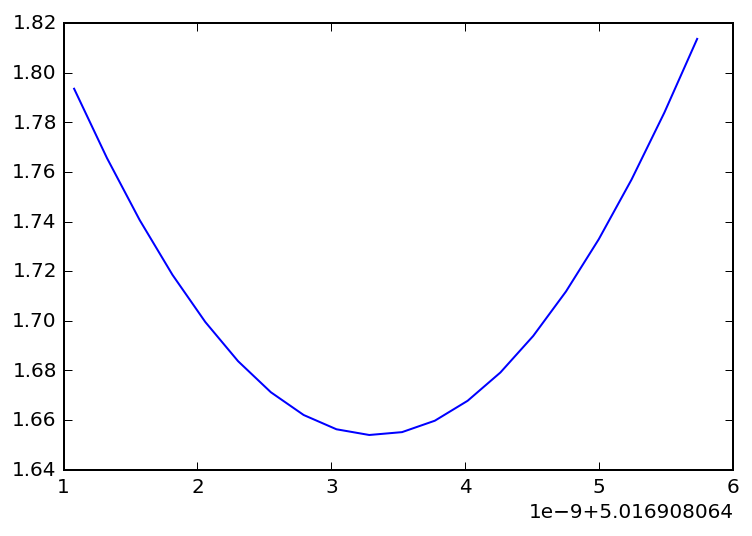

In [21]:
def raj2res(raj):
    psr['RAJ'].val = raj
    return math.sqrt(N.mean(psr.residuals()**2)) / 1e-6    # rms residual in us

x0, dx = psr['RAJ'].val, psr['RAJ'].err
x = x0 + dx * N.linspace(-3,3,20)         # we look +/- 3 sigmas around the current value

P.plot(x,N.vectorize(raj2res)(x))

psr['RAJ'].val = x0                       # restore the original value

We can also call the tempo2 fitting routine, which will fit around the current parameter values, replacing them with their new best values. Individual parameters can be included or excluded in the fitting by setting their 'fit' field.

In [22]:
psr['DM'].fit

False

In [23]:
psr['DM'].fit = True
print(psr['DM'].val)

10.39468


In [24]:
psr.fit()

In [25]:
print(psr['DM'].val, psr['DM'].err)

12.5086865395 3.41799132724


The least-square-fit approximated chi squared is then available as `psr.fitchisq`, while the exact chi squared of the residuals is computed by `psr.chisq()` (which evaluates `N.sum(psr.residuals()**2 / (1e-12 * psr.toaerrs**2))`). 

It's also possible to obtain the design matrix computed at the current parameter values, which has shape `psr.nobs * (len(psr.pars) + 1)`, since a constant offset is always included among the fitting parameters.

In [26]:
d = psr.designmatrix()

These, for instance, are the derivatives with respect to RAJ and DECJ, evaluated at the TOAs.

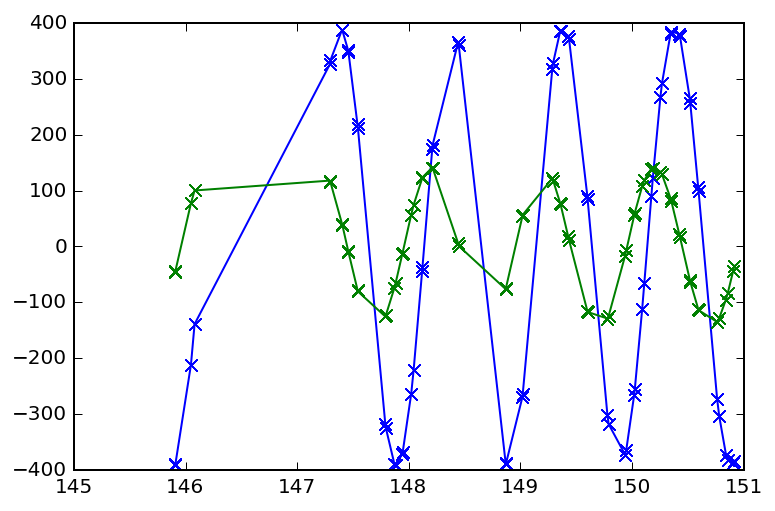

In [27]:
P.plot(psr.toas()[i]/365.25,d[i,1],'-x'); P.hold(True)
P.plot(psr.toas()[i]/365.25,d[i,2],'-x')

It's easy to save the current timing-model to a new par file. Omitting the argument will overwrite the original parfile.

In [28]:
psr.savepar('./foo.par')

In [29]:
!head foo.par

PSRJ           1909-3744
RAJ             19:09:47.4380320         1  0.00001067133466237498   
DECJ           -37:44:14.31897           1  0.00045632410153928151   
F0             339.31569275867931401     1  0.00000000000381385620   
F1             -1.6147937524480696365e-15 1  3.221916052238800515e-20 
PEPOCH         53000                       
POSEPOCH       53000                       
DMEPOCH        53000                       
DM             12.508686539480318913     1  3.41799132723986698323   
PMRA           -9.6108587494201483835    1  0.03081013288718472201   


Planned enhancements to the module include multi-pulsar support, as well as tim-file writing. Other suggestions are welcome!

In [30]:
psr.savetim('./foo.tim')

In [31]:
!head foo.tim

FORMAT 1
MODE 1
 53292.000004.1.000.000.tsum 1372.00000000 53292.01653552588140172 1.23100 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -tobs 901.322 -pta NANOGrav -proc dfg+12 -chanid gasp_1372 
 53292.000010.1.000.000.tsum 1372.00000000 53292.04810962983469835 4.66800 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -tobs 901.322 -pta NANOGrav -proc dfg+12 -chanid gasp_1372 
 53355.000005.1.000.000.tsum 1372.00000000 53355.83359727578050169 0.45300 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -tobs 1081.587 -pta NANOGrav -proc dfg+12 -chanid gasp_1372 
 53800.000018.1.000.000.tsum 1372.00000000 53800.48353665754979858 0.14800 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -tobs 3424.969 -pta NANOGrav -proc dfg+12 -chanid gasp_1372 
 53838.000020.1.000.000.tsum 1372.00000000 53838.37506136744340068 0.54300 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -tobs 3064.446 -pta NANOGrav -proc dfg+12 -chanid gasp_1372 
 53858.000028.1.000.000.tsum 1372.00000000 53858.31918408581089963 0.08900 gbt -fe Rcvr1_2 -be GASP -B L -bw 4.0 -to

With this interface, it's not hard to replicate some of the toasim plugin functionality. By subtracting the residuals from the site TOAs (psr.stoas, vs. the barycentered psr.toas) and refitting, we can create a "perfect" timing solution. (Note that 1 ns is roughly tempo2's claimed accuracy.)

In [33]:
print(math.sqrt(N.mean(psr.residuals()**2)) / 1e-6)

1.7909873901097249


In [34]:
psr.stoas[:] -= psr.residuals() / 86400.0
psr.fit()

In [36]:
print(math.sqrt(N.mean(psr.residuals()**2)) / 1e-6)

0.0006440434624035196


Then we can add, e.g., homoskedastic white measurement noise at 100 ns (remember the tempo units: days for TOAs, us for errors, s for residuals).

In [37]:
psr.stoas[:] += 0.1e-6 * N.random.randn(psr.nobs) / 86400.0
psr.toaerrs[:] = 0.1
psr.fit()

<Container object of 3 artists>

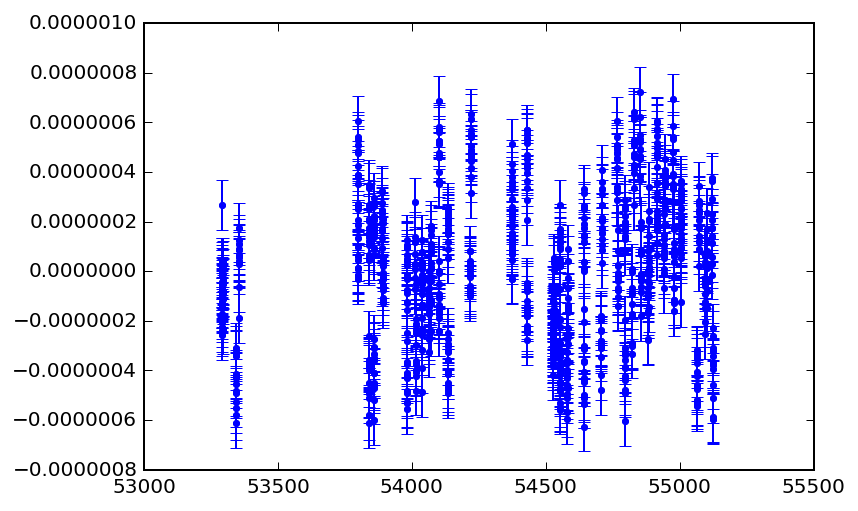

In [38]:
i = N.argsort(psr.toas())
P.errorbar(psr.toas()[i],psr.residuals()[i],yerr=1e-6*psr.toaerrs[i],fmt='.')